## Спектральная кластеризация: сравнение с другими подходами

[Когда использовать?](https://crunchingthedata.com/when-to-use-spectral-clustering/)

In [2]:
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import pylab as pl
import networkx as nx

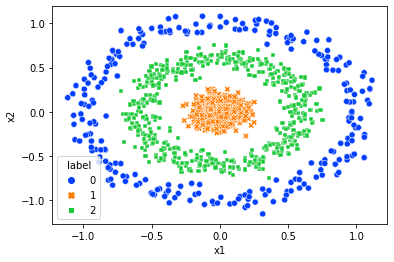

In [35]:
X_small, y_small = make_circles(n_samples=(250,500), random_state=3, noise=0.07, factor = 0.1)
X_large, y_large = make_circles(n_samples=(250,500), random_state=3, noise=0.07, factor = 0.6)

y_large[y_large==1] = 2

df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])
df.label.value_counts()
sns.scatterplot(data=df,x='x1',y='x2',hue='label',style='label',palette="bright")

In [36]:
x1 = np.expand_dims(df['x1'].values, axis=1)
x2 = np.expand_dims(df['x2'].values, axis=1)
X = np.concatenate((x1,x2), axis=1)
y = df['label'].values

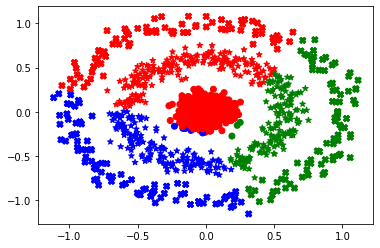

In [37]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show()

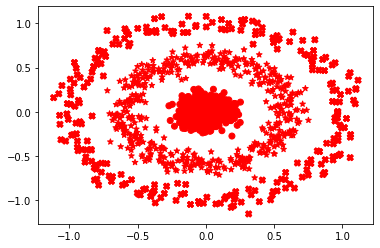

In [38]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=10, min_samples=5).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, gamma=1000).fit(X)

colors = ['r','g','b']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
plt.scatter(X[y==2, 0], X[y==2, 1], c=colors[y==2], marker='*')
plt.show()

## Сегментация изображений при помощи спектральной кластеризации

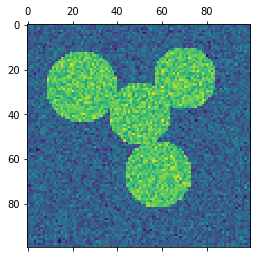

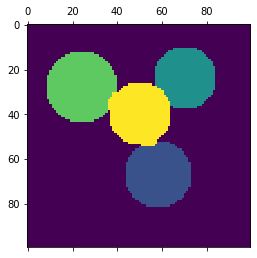

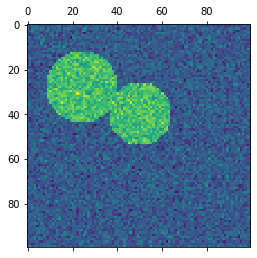

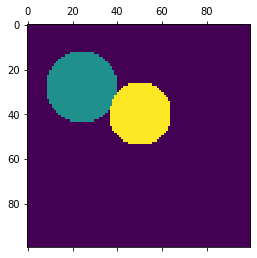

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()